## <img style="float: left; padding-right: 10px; width: 45px" src="http://www.ufopa.edu.br/media/file/site/ufopa/imagens/2018/f277f8862c1cc28b26ed9525312ccbfa.jpg"> LAB0 - Criar um modelo de classificação com o designer do Azure Machine Learning e com JupyterLab
## Disciplina: Inteligência Artificial

**Bacharelado em Sistemas de Informação**<br>
**Turma: 2019**<br>
**Professora:** Dra. Flávia Monteiro <br>
**Alunos:** Crystian Printes Cativo <br>
            Raiane da Silva Coimbra<br>
            
---

In [1]:
#Execute esta celula
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Instalando as bibliotecas necessárias


In [2]:
# import as bibliotecas necessárias
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report 


import sklearn as skl

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

## Dataset sobre Conjunto de dados de previsão de insuficiência cardíaca.
**11 características clínicas para prever eventos de doenças cardíacas.**<br>
**Nessa parte estou usando o lib do pandas para poder mostrar todo o meu dataset o qual estarei trabalhando.**<br>
---
**Informações sobre o dataset**<br>
**Idade:** idade do paciente [anos]<br>
**Sexo:** sexo do paciente [M: Masculino, F: Feminino]<br>
**Tipo de dor torácica:** tipo de dor torácica [TA: angina típica, ATA: angina atípica, NAP: dor não anginosa, ASY: assintomática]<br>
**BP em repouso:** pressão arterial em repouso [mm Hg]<br>
**Colesterol:** colesterol sérico [mm / dl]<br>
**SB em jejum:** açúcar no sangue em jejum [1: se SB em jejum> 120 mg / dl, 0: caso contrário]<br>
ECG em repouso: resultados de eletrocardiograma em repouso [Normal: Normal, ST: tendo anormalidade da onda ST-T (inversões da onda T e / ou elevação ou depressão de ST> 0,05 mV), HVE: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes]<br>
**MaxHR:** freqüência cardíaca máxima alcançada [valor numérico entre 60 e 202]<br>
**ExerciseAngina:** angina induzida por exercício [S: Sim, N: Não]<br>
**Oldpeak:** oldpeak = ST [valor numérico medido na depressão]<br>
**ST_lope:** a inclinação do pico do segmento ST do exercício [Up: uploping, Flat: flat, Down: downsloping]<br>
**HeartDisease:** classe de débito [1: doença cardíaca, 0: Normal]<br>


In [3]:
heart = pd.read_csv("data/heart.csv")
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


---
## Listando todas as colunas do meu dataset.

In [4]:
heart.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'], dtype='object')

---

## Grafico por idade.
**Mostrando em graficos todas por idade.**<br>
Podemos dizer que foram usados nessa pesquisa pessoas com idade entre 30 e 80 anos.

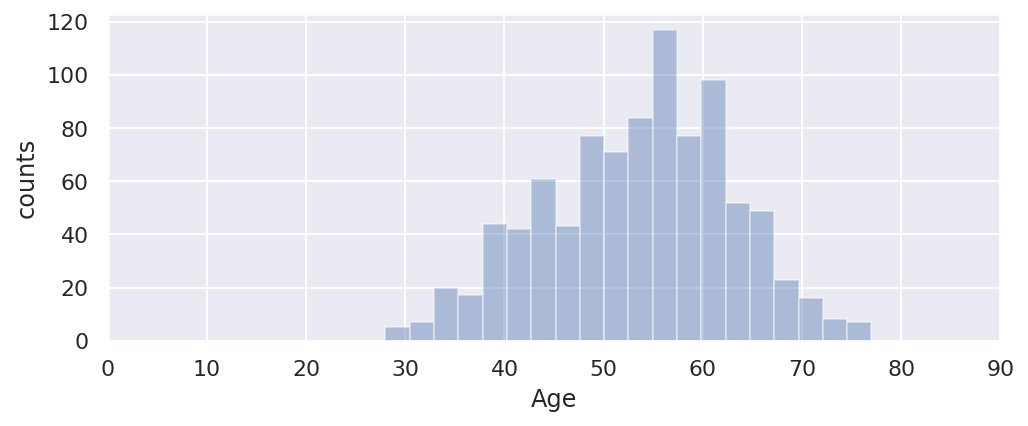

In [5]:
import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(heart.Age, kde=False, bins=20)

# bug
#ax = sns.distplot(titanic.age, kde=False, bins=20).set(xlim=(0, 90));

ax.set(xlim=(0, 90));
ax.set_ylabel('counts');

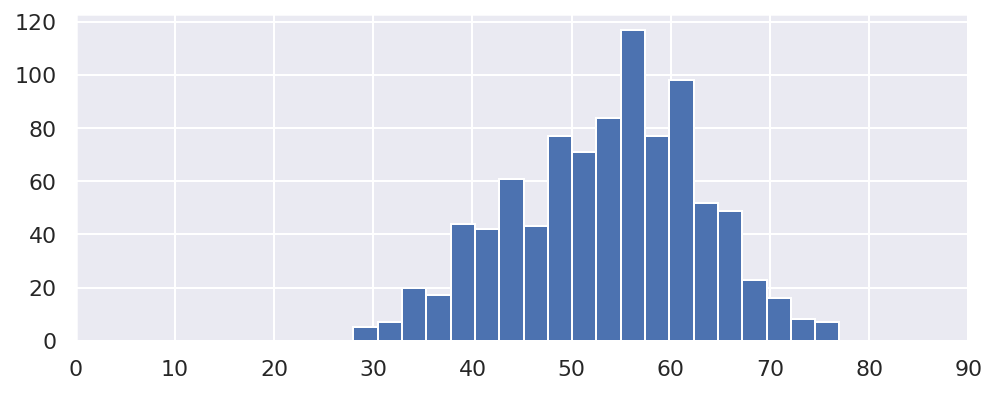

In [6]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(heart.Age, bins=20);
ax.set_xlim(0,90);

---

## Conhecendo melhor o nosso dataset.

**Com o codigo abaixo podemos coletar as seguintes informações**:<br>
**Colunas:** 12 colunas(0 à 11);<br>
**Entradas:** 918 entradas(0 à 917);<br>
**Valores nulos:** 0;<br>
**tipo de dados** Float64(1), int64(6) e object/string(5)

In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


---
**Usando a função '.describe' da lib do pandas**<br>
Ao executar a celula abaixo, obteremos os seguintes dados:<br>
**Count:** Quantidade total de dados;<br>
**mean:** A média de cada coluna quantitativa;<br>
**std:** o desvio padrão;<br>
**min:** Valor minimo de cada coluna;<br>
**O que é um Quartil?**<br>
Quartis é a divisão do conjunto de dados em 4 partes, ou seja, em pedaços de tamanhos iguais que contém 25% dos dados.<br>
**1º Quatil:** 25% do dados de cada coluna;<br>
**2º Quatil/mediana:** 50% do dados de cada coluna;<br>
**3º Quatil:** 75% do dados de cada coluna;<br>
**max:** Valor maximo de cada coluna;<br>

In [8]:
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


---

## Configurando dados para o treinamento da IA
**Fazendo a divisão**<br>
Nesta parte dividimos os dados para treino e para teste do nosso dataset.

In [9]:
Y = heart['HeartDisease']
X = heart[['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR','Oldpeak']]
X_featurenames = X.columns
# Split the data into train and test data:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

---
**Mostrando a classe HeartDisease , o qual diz se o paciente apresenta ou não doença cardica.**

In [10]:
heart['HeartDisease']

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

---

## Configurando a tecnica de Classificação
**Profundidade máxima das árvores de decisão:** 20<br>
**Semente aleatoria:** 123 <br>
**O número de árvores na floresta/Numero de estimadores** 50

In [11]:
model = RandomForestClassifier(max_depth = 20, random_state = 123, n_estimators = 50)
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=20, n_estimators=50, random_state=123)

---
## Realizando a Predição do teste
**Mostrando o resultado**<br>
Nesta parte mostramos as metricas obtitas nesse teste.

In [13]:
y_pred = model.predict(X_test)
print(classification_report(Y_test, y_pred, target_names=["HeartDisease -ve", "HeartDisease +ve"]))

                  precision    recall  f1-score   support

HeartDisease -ve       0.73      0.77      0.75        79
HeartDisease +ve       0.82      0.78      0.80       105

        accuracy                           0.78       184
       macro avg       0.77      0.78      0.77       184
    weighted avg       0.78      0.78      0.78       184

